In [66]:
# -*- coding:utf-8 -*-
# @Author: Niccolò Bonacchi
# @Date: Thursday, February 21st 2019, 7:13:37 pm
# @Last Modified by: Niccolò Bonacchi
# @Last Modified time: 21-02-2019 07:35:12.1212

from pathlib import Path
import ibllib.io.raw_data_loaders as raw
import matplotlib.pyplot as plt
import numpy as np
import sys


def get_port_events(events: dict, name: str = '') -> list:
    out: list = []
    for k in events:
        if name in k:
            out.extend(events[k])
    out = sorted(out)

    return out
session_path = r'C:\iblrig_data\Subjects\_iblrig_test_mouse\2022-09-08\001//'

#local test mouse path: r'C:\iblrig_data\Subjects\_iblrig_test_mouse\2022-09-31\004//'
#synapse path: r'Z:\moraogando\IBLdata\Box1_basement\MBOT42_1840\2022-08-23\002//'
#local path:  r'C:\iblrig_data\Subjects\MBOT42_1840\2022-08-19\005//'


Found 5 trials with bad sync data for Box 1


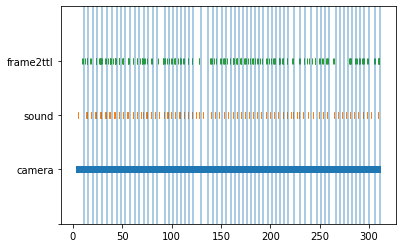

In [67]:

session_data_file = Path(session_path)
if not session_data_file.exists():
    raise (FileNotFoundError)
data = raw.load_data(session_data_file)
unsynced_trial_count = 0
frame2ttl = []
sound = []
camera = []
trial_end = []
for trial_data in data:
    tevents = trial_data['behavior_data']['Events timestamps']
    ev_bnc1 = get_port_events(tevents, name='BNC1')
    ev_bnc2 = get_port_events(tevents, name='BNC2')
    ev_port1 = get_port_events(tevents, name='Port1')
    if not ev_bnc1 or not ev_bnc2 or not ev_port1:
        unsynced_trial_count += 1
    frame2ttl.extend(ev_bnc1)
    sound.extend(ev_bnc2)
    camera.extend(ev_port1)
    trial_end.append(trial_data['behavior_data']['Trial end timestamp'])
print(f'Found {unsynced_trial_count} trials with bad sync data for Box 1')

f = plt.figure()  #figsize=(19.2, 10.8), dpi=100)
ax = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

ax.plot(camera, np.ones(len(camera)) * 1, '|')
ax.plot(sound, np.ones(len(sound)) * 2, '|')
ax.plot(frame2ttl, np.ones(len(frame2ttl)) * 3, '|')
[ax.axvline(t, alpha=0.5) for t in trial_end]
ax.set_ylim([0, 4])
ax.set_yticks(range(4))
ax.set_yticklabels(['', 'camera', 'sound', 'frame2ttl'])
plt.show()

In [63]:
trial_data['behavior_data']['Events timestamps']['Tup']

[3383.292699,
 3383.2927990000003,
 3383.7927990000003,
 3383.892799,
 3384.892799,
 3384.922599,
 3385.1036990000002,
 3390.1036990000002,
 3390.203699,
 3390.703699]